# Choose a Car Profitably [Car Price prediction]

This work has made in cooperation with Vetak8:
#### [GitHub](https://github.com/vetak8)
#### [Kaggle](https://www.kaggle.com/vitaliyburlakov)

<img src = 'https://i.ytimg.com/vi/Qr9S2zYfAfs/maxresdefault.jpg' width= '800px'>

# Description

The Target of this project is to:
- Collect a dataset from outside sources for training a model. 
- To make a exploratory data analysis 
- Try to predict the price of a car with given technical and commercial car's parameters.

# Note
The training data already collected from auto.ru  by using dedicated notebook. You may find it in GitHUB in the link below:

#### [GitHub_Data_Collector](https://github.com/Paull-dark/Skill_Factory/tree/master/module_6_Cars)

<a id="sec1.1"></a>
## [Features Defination](sec1.1)

**BodyType** -  The type of the Body of car .

**Brand** - Name of brand.

**color** - Color of the car (hex).

**complectation_dict** - specified complecttion of the car.

**description** - human's description of the car (given by seller).

**engineDisplacement** - Working volume of the engine (in $mm^3$).

**enginePower** - Power in Horses.

**equipment** - set of auxilliary equipment.

**fuelType - Diesel, gasoline electric etc.

**image** - url of the image of car.

**mileage** - How many kilometers car passed up to the date.

**modelDate** - When particular model has been designed.

**name** - shows bolume of engine and horse power.

**numberOfDoors** - The number of doors in a single car.

**parsing_unixtime** - time of parsing the data.

**PriceCurrency** - The currency of the car's price.

**productionDate** - The date when the car has been released from factory.

**sell_id** - id number of the seller.

**super_gen** - dictionary with data like: model, price_segment.

**vehicleConfiguration** - shows body type, type of gear, volume of engine.

**vehicleTransmission** - Gear type.

**vendor** - Contry of model's origin.

**Владельцы** - How many owners had particular car before.

**Владение** - How long the seller own a particular car.

**ПТС** - Shows whether the car's documents in original state.

**Привод** - Wheel drive (2WF,4WD etc).

**Руль** - Left or right Wheel.

**Состояние** - condition of a car (good or not).

**Таможня** - whether Custom clearance performed.

**price** - price in RUB.

<a id="sec2"></a>
# [INDEX](#sec2)

<a id="sec1"></a>
1. [Description](#sec1)
   * [1.1 Features Defination](#sec1.1)
2. [INDEX](#sec2)
3. [IMPORT LIBRARRIES](#sec3)
4. [Functions and Classes](#sec4)
5. [Load and Chek the Dataset](#sec5)

In [1]:
import os
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from jupyterthemes import jtplot

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Lock a RANDOM SEED to keep experiments reproducible.
np.random.seed(42)

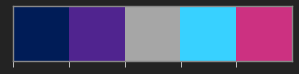

In [3]:
# Set project colors
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff','#cc3181']
sns.palplot(sns.color_palette(colors))

<a id="sec4"></a>
# [Functions and Classes](#sec4)
[(INDEX)](#sec2)

In [4]:
#  у участников найдена функция по сравнению дата-сетов. Немного преобразовал для удобства восприятия
def compare_data_sets(train_df,test_df):
    
    list_of_names1 = list(train_df.columns)
    temp_dict = {}
    temp_dict['feature_train'] = list_of_names1
    temp_dict['type_train'] = train_df.dtypes
    temp_dict['sample_train'] = train_df.loc[1].values
    temp_dict['# unique_train'] = train_df.nunique().values
    temp_df1 = pd.DataFrame.from_dict(temp_dict)
    
    
    list_of_names2 = list(test_df.columns)
    temp_dict2 = {}
    temp_dict2['feature_test'] = list_of_names2
    temp_dict2['type_test'] = test_df.dtypes
    temp_dict2['sample_test'] = test_df.loc[1].values
    temp_dict2['# unique_test'] = test_df.nunique().values
    temp_df2 = pd.DataFrame.from_dict(temp_dict2)
    
    temp_insert = pd.DataFrame(columns=['< - >'])
    
    temp_df = pd.concat([temp_df1,temp_insert, temp_df2], axis=1, sort=False)
    temp_df.reset_index(inplace = True)
    del temp_df['index']
    temp_df['< - >'] = '| - |'
    display(temp_df)

    temp_dict3 = {}
    temp_df3= pd.DataFrame(temp_df)
    temp_list  = []
    temp_list2  = []
    temp_list3  = []
    temp_list4  = []
    temp_list5  = []

    for i in range(len(temp_df)):
        if str(temp_df3['type_train'][i]) != str(temp_df3['type_test'][i]):
            temp_list.append(temp_df3['feature_train'][i])
            temp_list2.append(temp_df3['feature_test'][i])
            temp_list3.append(str(temp_df3['type_train'][i]) + ' != ' + str(temp_df3['type_test'][i]))
            temp_list4.append(i)
        if temp_df3['# unique_test'][i]>0 and temp_df3['# unique_train'][i]/temp_df3['# unique_test'][i] > 2:
            temp_list5.append(i)
            
    temp_dict3['index']= temp_list4
    temp_dict3['feature_train']= temp_list
    temp_dict3['не совпадают типы'] = temp_list3
    temp_dict3['feature_test']= temp_list2

    temp_df4 = pd.DataFrame.from_dict(temp_dict3)
    temp_df4.set_index('index',inplace=True)

    print(f'Резюме:\n 1. Не совпали типы в:= {len(temp_df4)} столбцах\n')
    print(f'2. Уникальные значения различаются в:= {len(temp_list5)} столбцах {temp_list5}')
    display(temp_df4)

# # После нескольких запусков выявили список столбцов, не полезных в дальнейшей работе
# # Это признаки, имеющие единственное значение, признаки не имеющие пары в обучающем и тестовом датасетах, признаки, 
# # содержащие консолидированную информацию, уже сохраненную в других признаках

# drop_cols = ['car_url', 'sell_id', 'image', 'hidden', 'parsing_unixtime', 'Состояние']

# for col in drop_cols:
#     if col in list(df_train.columns):
#         df_train.drop(columns=[col], inplace=True)
#     if col in list(df_test.columns):
#         df_test.drop(columns=[col], inplace=True)
    
# check_df_before_merg(df_train, df_test)

In [5]:
def pandas_report(data):
    ''' Function is called for generating of dataset profile-report'''

    profile = data.profile_report(
        title='Credit Scoring',
        progress_bar=False,
        correlations={
            'pearson': {'calculate': True},
            'spearman': {'calculate': True},
            'kendall': {'calculate': True},
            'phi_k': {'calculate': True},
            'cramers': {'calculate': True}        
        },
        
        interactions={
            'continuous': True,
            'targets': []
        },
        missing_diagrams={
            'heatmap': True,
            'dendrogram': True,
            'matrix': True
        },
        vars={
            'cat' : {'n_obs':10}
        }
    )
    
    return profile

In [6]:
def get_boxplot(data, X_axis, Y_axis, hue=None):
    '''Function is called to plot boxplots'''
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.boxplot(x=X_axis, y=Y_axis, hue=hue, data=data, palette=colors)
    plt.xticks(rotation=45)
    ax.set_title(f'Boxplot for {X_axis} and {Y_axis}', fontsize=14)
    plt.show()

In [7]:
class Preprocessing:
    def __init__(self, data):
        self.data = data

    def label_encoder(self, column):
        le = LabelEncoder()
        self.data[column] = le.fit_transform(self.data[column])

    def hot_enc(self, column):
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        aux_df = pd.DataFrame(ohe.fit_transform(self.data[[column]]))
        aux_df.columns = ohe.get_feature_names([f'hot_{column}'])
        self.data = self.data.drop(col, axis=1)
        self.data = pd.concat([self.data, aux_df], axis=1)
        return self.data 

In [8]:
def missing_vars(data, col='education', random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[col].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[col].value_counts(
            normalize=True).values  # get l;ist of probs
        missing = data[col].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [col]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [9]:
def corr_matrix(data, det=True, pltx=10, plty=10):
    '''Funcion is called for making correlation matrix'''
    
    X = data.corr()
    if det:
        
        evals,evec = np.linalg.eig(X)
        ev_product = np.prod(evals)
    
        print(f'Rank of Matrix: {np.linalg.matrix_rank(X)}')
        print(f'Determinant of matrix: {np.round(ev_product,4)}')
        print(f'Shape of matrix: {np.shape(X)}')
    
    plt.figure(figsize=(pltx,plty))
    sns.heatmap(X,vmin=0,vmax=.9,annot=True,square=True)
    plt.show()

<a id="sec5"></a>
# [5.Load and Chek the Dataset](#sec5)
[(INDEX)](#sec2)

In [56]:
df_train = pd.read_csv('train_parsed_18_05_21.csv',low_memory=False)
df_test = pd.read_csv('test.csv')

In [57]:
df_test['price'] = np.nan

# let's mark where is train where is test set.
df_train['sample'] = 'train'  # train
df_test['sample'] = 'test'  # test

In [58]:
print(
    f'Shape of Train Dataset:{df_train.shape}\nShape of Test Dataset:{df_test.shape} \n'
)

Shape of Train Dataset:(110772, 35)
Shape of Test Dataset:(34686, 34) 



For the proper processing of features, we need to combine train and test sets into a one dataset.

However, as we scrapped data from web, we have to compare whar we scrapped with test set and then fix it 

In [48]:
compare_data_sets(df_train,df_test)

,feature_train,type_train,sample_train,# unique_train,< - >,feature_test,type_test,sample_test,# unique_test
0,bodyType,object,Внедорожник 5 дв.,112,| - |,bodyType,object,лифтбек,24.0
1,brand,object,BMW,15,| - |,brand,object,SKODA,12.0
2,car_url,float64,NaN,0,| - |,car_url,object,https://auto.ru/cars/used/sale/skoda/octavia/1...,34686.0
3,color,object,FAFBFB,16,| - |,color,object,чёрный,16.0
4,complectation_dict,object,{'id': '0'},3935,| - |,complectation_dict,object,NaN,2364.0
5,description,object,"Автомобиль в идеальном состоянии ,куплен в мар...",44907,| - |,description,object,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,31732.0
6,engineDisplacement,float64,2993.0,433,| - |,engineDisplacement,object,1.6 LTR,55.0
7,enginePower,float64,245.0,328,| - |,enginePower,object,110 N12,315.0
8,equipment_dict,object,{},34472,| - |,equipment_dict,object,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",23705.0
9,fuelType,object,дизель,6,| - |,fuelType,object,бензин,5.0


Резюме:
 1. Не совпали типы в:= 8 столбцах

2. Уникальные значения различаются в:= 2 столбцах [0, 6]


,feature_train,не совпадают типы,feature_test
index,,,
2,car_url,float64 != object,car_url
6,engineDisplacement,float64 != object,engineDisplacement
7,enginePower,float64 != object,enginePower
12,modelDate,float64 != int64,modelDate
16,numberOfDoors,float64 != int64,numberOfDoors
17,parsing_unixtime,object != int64,parsing_unixtime
25,Владельцы,float64 != object,Владельцы
32,price_segment,object != nan,NaN


We can see that 8 columns in test and train datasets have different datatypes. We have to threat it before stacking datasets.

- CAR_URL -ignore this feature and delete from test set

- Engine_displacement - convert data from train set to $liters$ and clear letters from test set

- Engine_power - Clear trash from test set and convert it to float64 type

- numberOfDoors - convert float64 in train set to int64(same with test set)

- parsing_unixtime - delete this column. (we did not include this data during parsing due to lack of brain :) )


<a id="sec5.1"></a>
## [5.1 Fixing problems](#sec5.1)
[(INDEX)](#sec2)

In [59]:
df_test = df_test.drop(['car_url','parsing_unixtime'],axis=1)
df_train = df_train.drop(['car_url','parsing_unixtime'],axis=1)

In [64]:
# convert mm to liters
df_train['engineDisplacement'] = round(df_train['engineDisplacement']/1000,1)
# clear 'LTR'
df_test['engineDisplacement'] = df_test['engineDisplacement'].apply(lambda x: str(x).replace('LTR', ''))
df_test['engineDisplacement']= df_test['engineDisplacement'].astype('float64')

ValueError: could not convert string to float: ''

In [62]:
df_test['engineDisplacement'].unique()

array(['1.2 ', '1.6 ', '1.8 ', '2.0 ', '1.4 ', '1.3 ', '1.0 ', '3.6 ',
       '1.5 ', '1.9 ', '2.8 ', '1.1 ', '2.5 ', '4.2 ', '3.0 ', '4.0 ',
       '5.9 ', '2.7 ', '3.1 ', '2.4 ', '5.2 ', '3.2 ', '4.1 ', '6.3 ',
       '2.3 ', '6.0 ', '2.2 ', '3.7 ', '2.9 ', '5.0 ', '3.3 ', '2.1 ',
       '2.6 ', ' ', '3.5 ', '1.7 ', '0.7 ', '4.4 ', '4.8 ', '5.4 ',
       '6.6 ', '4.9 ', '3.8 ', '3.4 ', '3.9 ', '4.6 ', '5.6 ', '4.5 ',
       '5.5 ', '6.2 ', '4.7 ', '4.3 ', '5.8 ', '5.3 ', '5.7 '],
      dtype=object)